In [26]:
import pandas as pd

In [27]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [28]:
data = pd.read_csv("/content/houseprice.csv", usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125


In [29]:
for i in data.columns:
  print("Column name {} has {} unique values".format(i,len(data[i].unique())))

Column name MSSubClass has 15 unique values
Column name MSZoning has 5 unique values
Column name LotFrontage has 110 unique values
Column name LotArea has 869 unique values
Column name Street has 2 unique values
Column name LotShape has 4 unique values
Column name YearBuilt has 112 unique values
Column name 1stFlrSF has 678 unique values
Column name 2ndFlrSF has 368 unique values
Column name SalePrice has 597 unique values


In [30]:
import datetime
datetime.datetime.now().year

2023

In [31]:
#Creating derive feature Total years and remove yearBuilt
data["Total years"] = datetime.datetime.now().year - data["YearBuilt"]

In [32]:
data.drop("YearBuilt", axis = 1, inplace = True)

In [33]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,20
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,47
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,22
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,108
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,953,694,175000,24
1456,20,RL,85.0,13175,Pave,Reg,2073,0,210000,45
1457,70,RL,66.0,9042,Pave,Reg,1188,1152,266500,82
1458,20,RL,68.0,9717,Pave,Reg,1078,0,142125,73


In [34]:
#Select categorical features
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [35]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    data[feature]=lbl_encoders[feature].fit_transform(data[feature])

In [36]:
#stacking and convertting categorical features into numpy
import numpy as np
cat_features = np.stack([data["MSSubClass"], data["MSZoning"], data["Street"], data["LotShape"]], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [37]:
import torch
cat_features = torch.tensor(cat_features, dtype = torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [38]:
#Convert continuous valriables.
cont_features=[]
for i in data.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [39]:
### Stacking continuous variable to a tensor
cont_values=np.stack([data[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [40]:
#Convert dependent variable to tensor

y = torch.tensor(data["SalePrice"].values, dtype = torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [41]:
#Embedding layer should only be done for Categorical features
#### Embedding Size For Categorical columns
cat_dims=[len(data[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [42]:
#Thujmb rule for defining output dimension, its based on input dimention min(50, feature_dim//2)
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]


In [43]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [44]:
import torch
import torch.nn as nn
from torch.nn import functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out)for inp, out in embedding_dim])


In [45]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [46]:
embedding_val


[tensor([[ 1.6332,  0.3590,  0.1709,  ..., -1.0470, -0.6722, -1.3891],
         [-2.0583, -0.2660, -0.2036,  ...,  0.7662, -0.5654,  1.1576],
         [ 1.6332,  0.3590,  0.1709,  ..., -1.0470, -0.6722, -1.3891],
         ...,
         [ 0.9529, -1.6729, -1.8276,  ..., -0.6037, -1.3482, -0.7661],
         [-2.0583, -0.2660, -0.2036,  ...,  0.7662, -0.5654,  1.1576],
         [-2.0583, -0.2660, -0.2036,  ...,  0.7662, -0.5654,  1.1576]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.5088, -0.5295,  0.1677],
         [ 0.5088, -0.5295,  0.1677],
         [ 0.5088, -0.5295,  0.1677],
         ...,
         [ 0.5088, -0.5295,  0.1677],
         [ 0.5088, -0.5295,  0.1677],
         [ 0.5088, -0.5295,  0.1677]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6157],
         [-0.6157],
         [-0.6157],
         ...,
         [-0.6157],
         [-0.6157],
         [-0.6157]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7375, -0.8247],
         [-0.7375, -0.8247],
         [ 1.1364,  0.

In [47]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 1.6332,  0.3590,  0.1709,  ..., -0.6157, -0.7375, -0.8247],
        [-2.0583, -0.2660, -0.2036,  ..., -0.6157, -0.7375, -0.8247],
        [ 1.6332,  0.3590,  0.1709,  ..., -0.6157,  1.1364,  0.5120],
        ...,
        [ 0.9529, -1.6729, -1.8276,  ..., -0.6157, -0.7375, -0.8247],
        [-2.0583, -0.2660, -0.2036,  ..., -0.6157, -0.7375, -0.8247],
        [-2.0583, -0.2660, -0.2036,  ..., -0.6157, -0.7375, -0.8247]],
       grad_fn=<CatBackward0>)

In [48]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [49]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [50]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [51]:

model = model.cuda()

In [52]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [66]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [64]:
train_cont

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   70.,  7910.,  1507.,     0.,    63.],
        [   70.,  7728.,  1190.,     0.,    61.],
        [   70.,  9842.,  1224.,     0.,    61.]])

In [67]:
#Convert X and y to tensors
train_cont = torch.FloatTensor(train_cont).cuda()
test_cont = torch.FloatTensor(test_cont).cuda()

train_categorical = torch.LongTensor(train_categorical).cuda()
test_categorical = torch.LongTensor(test_categorical).cuda()

y_train = torch.FloatTensor(y_train).cuda()
y_test = torch.FloatTensor(y_test).cuda()

In [71]:
epochs=50000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%1000==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 34391.07421875
Epoch number: 1001 and the loss : 34172.76953125
Epoch number: 2001 and the loss : 32628.4296875
Epoch number: 3001 and the loss : 32742.572265625
Epoch number: 4001 and the loss : 34037.12109375
Epoch number: 5001 and the loss : 34475.27734375
Epoch number: 6001 and the loss : 33191.08984375
Epoch number: 7001 and the loss : 35095.4609375
Epoch number: 8001 and the loss : 31726.287109375
Epoch number: 9001 and the loss : 32620.3203125
Epoch number: 10001 and the loss : 33861.1875
Epoch number: 11001 and the loss : 33166.51171875
Epoch number: 12001 and the loss : 34236.25
Epoch number: 13001 and the loss : 33315.453125
Epoch number: 14001 and the loss : 33923.703125
Epoch number: 15001 and the loss : 33668.296875
Epoch number: 16001 and the loss : 32197.13671875
Epoch number: 17001 and the loss : 32783.7578125
Epoch number: 18001 and the loss : 33181.515625
Epoch number: 19001 and the loss : 33521.640625
Epoch number: 20001 and the loss : 

TypeError: ignored

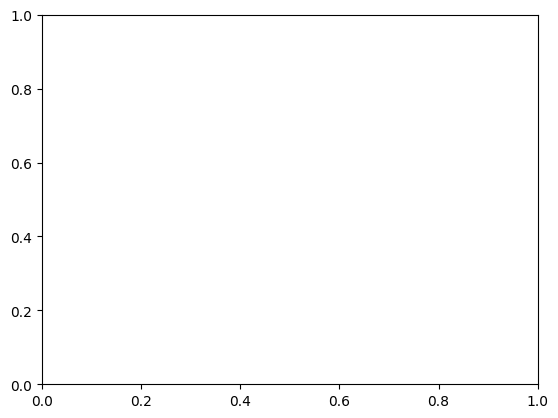

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [75]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 45489.53125


In [76]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])


In [77]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,182990.796875,-52990.796875
1,138887.0,180320.296875,-41433.296875
2,175500.0,199474.171875,-23974.171875
3,195000.0,275113.343750,-80113.343750
4,142500.0,152029.796875,-9529.796875
